# TP5: Forêts d'arbres aléatoires

# Chargements des bibliothèques

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [38]:
def visualize_classifier(model, X, y): 
    ax = plt.gca() 

    # Plot the training points 
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow', clim=(y.min(), y.max()), zorder=3) 
    ax.axis('tight') 
    ax.axis('off') 
    xlim = ax.get_xlim()   
    ylim = ax.get_ylim() 
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 

    # Create a color plot with the results 
    n_classes = len(np.unique(y)) 
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes     + 1) - 0.5, cmap='rainbow', zorder=1) 
    ax.set(xlim=xlim, ylim=ylim) 

    plt.show()

# 1. Chargement et visualisation des données.

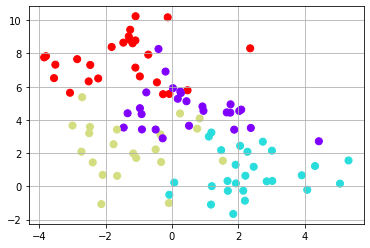

In [39]:
[X_train, y_train, X_test, y_test] = np.load("TP5a.npy",allow_pickle=True) 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='rainbow'); 
plt.grid()
plt.show()

In [40]:
print("Nombre de points de la base d'apprentissage : " ,X_train.shape[0])
print("Nombre de points de la base de test : ", X_test.shape[0])
print(f"Dimensions des données:  {X_train.shape[1]}D")

Nombre de points de la base d'apprentissage :  100
Nombre de points de la base de test :  4900
Dimensions des données:  2D


# 2. Arbres de decision

## a. Principe des arbres de décision

Le paramètre max_depth représente la longueur maximum des branches  de l'arbre de decision
Depth = 1


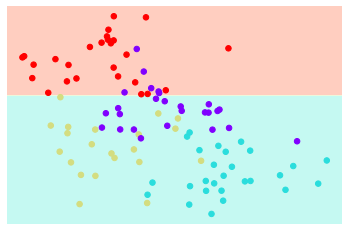

Depth = 2


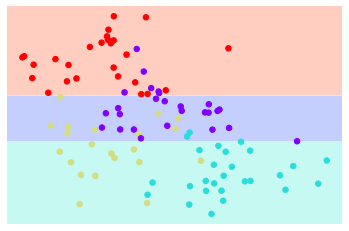

Depth = 3


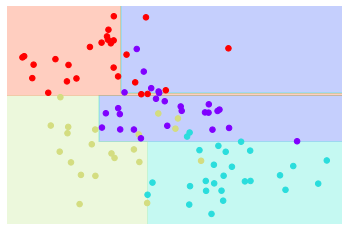

Depth = 4


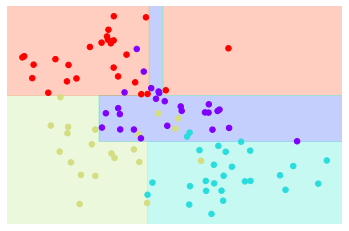

Depth = 5


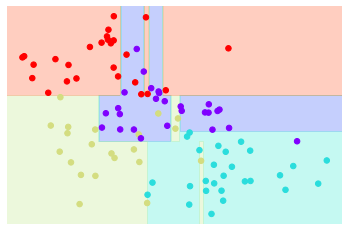

Depth = 6


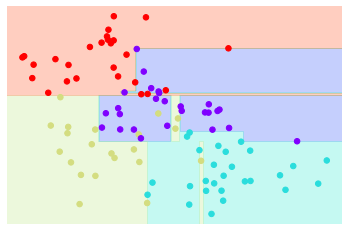

Depth = 7


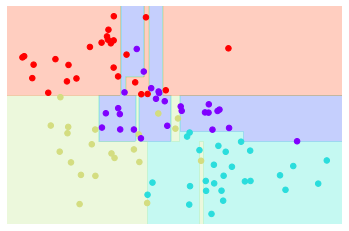

Depth = 8


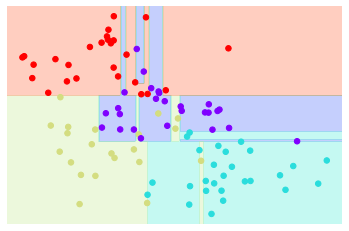

Depth = 9


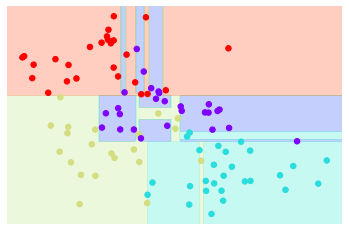

Depth = 10


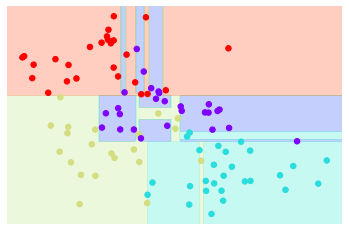

Depth = 11


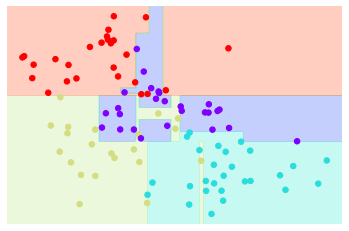

Depth = 12


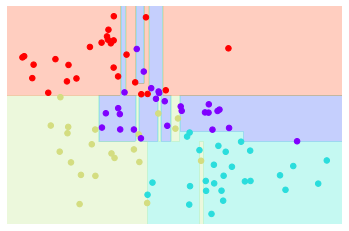

Depth = 13


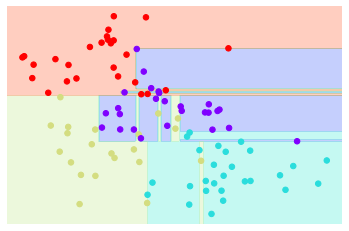

Depth = 14


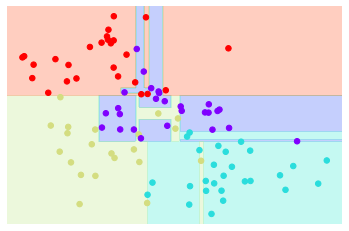

Depth = 15


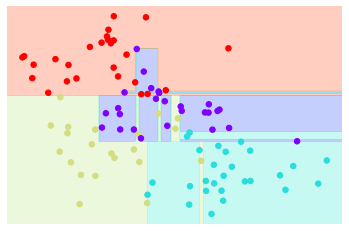

Depth = 16


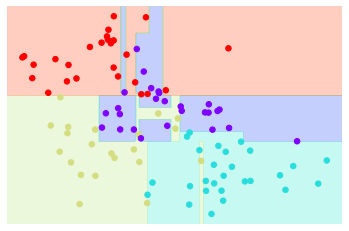

Depth = 17


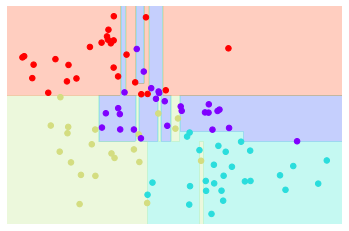

Depth = 18


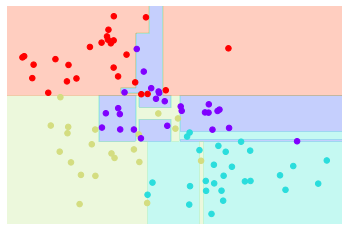

Depth = 19


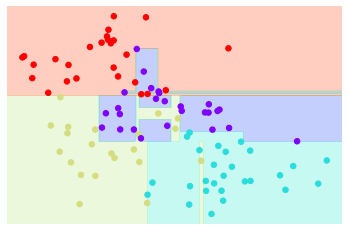

In [41]:
print("Le paramètre max_depth représente la longueur maximum des branches  de l'arbre de decision")
for d in range(1,5):
    tree = DecisionTreeClassifier(criterion='entropy',max_depth = d) 
    tree.fit(X_train, y_train) 
    print(f"Depth = {d}")
    visualize_classifier(tree, X_train, y_train)

## b. Performences d'un classifieur Multi-classes

In [42]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth = 3) 
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test) 
C=confusion_matrix(y_test, y_pred) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61      1224
           1       0.81      0.80      0.80      1223
           2       0.78      0.63      0.70      1229
           3       0.88      0.58      0.70      1224

    accuracy                           0.70      4900
   macro avg       0.75      0.70      0.70      4900
weighted avg       0.75      0.70      0.70      4900



In [43]:
C

array([[957, 127,  85,  55],
       [149, 977,  97,   0],
       [314, 102, 774,  39],
       [478,   0,  31, 715]], dtype=int64)

In [44]:
print("Retrouver les paramètres du report de la première ligne à partir de C")
print(f"Precision = {(957)/(957+149+314+478)}")
print(f"Recall = {(957)/(1224)}")
print(f"Fi-score = {((957)/(1224) + (957)/(957+149+314+478)) /2}")
print(f"support = {957+127+85+55}")


Retrouver les paramètres du report de la première ligne à partir de C
Precision = 0.5042149631190727
Recall = 0.7818627450980392
Fi-score = 0.6430388541085559
support = 1224


## c. Optimisation de la profondeur de l’arbre

In [45]:
score = []
depth = []
for d in range(1,20):
    depth.append(d)
    tree = DecisionTreeClassifier(criterion='entropy',max_depth = d) 
    tree.fit(X_train, y_train) 
    y_pred = tree.predict(X_test) 
    sco = accuracy_score(y_test, y_pred)
    score.append(sco*100)


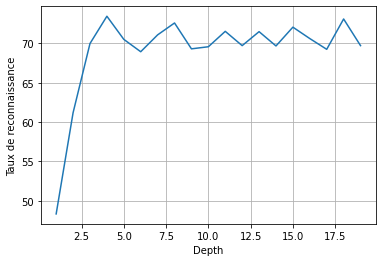

In [46]:
plt.plot(depth, score)
plt.xlabel("Depth")
plt.ylabel("Taux de reconnaissance")
plt.grid()


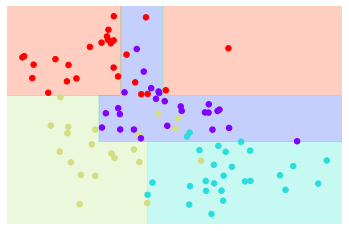

In [47]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth = 3) 
tree.fit(X_train, y_train) 
visualize_classifier(tree, X_train, y_train)

# 3. Arbres de decision sur des données de grandes dimensions

## a. Classification avec un arbre de décision

In [48]:
[X_train, y_train, X_test, y_test] = np.load("TP5b.npy",allow_pickle=True)
print("Nombre de points de la base d'apprentissage : " ,X_train.shape[0])
print("Nombre de points de la base de test : ", X_test.shape[0])
print("Nombre de classe: ", 7)
print(f"Dimensions des données:  {X_train.shape[1]}D")


Nombre de points de la base d'apprentissage :  966
Nombre de points de la base de test :  322
Nombre de classe:  7
Dimensions des données:  50D


In [49]:
score = []
depth = []
for d in range(1,20):
    depth.append(d)
    tree = DecisionTreeClassifier(criterion='entropy',max_depth = d) 
    tree.fit(X_train, y_train) 
    y_pred = tree.predict(X_test) 
    sco = accuracy_score(y_test, y_pred)
    score.append(sco*100)

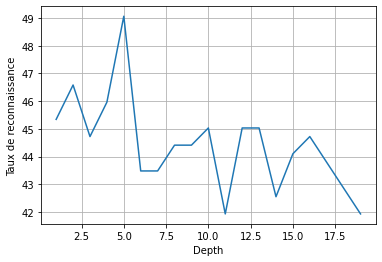

In [50]:
plt.plot(depth, score)
plt.xlabel("Depth")
plt.ylabel("Taux de reconnaissance")
plt.grid()

## b. Forêt d’arbres aléatoires

In [51]:
RF = RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1) 
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1)

In [54]:
y_pred = RF.predict(X_test) 
C=confusion_matrix(y_test, y_pred) 
print(classification_report(y_test, y_pred))
score = accuracy_score(y_test, y_pred)
print("Taux de reconnaissance = ",score*100)

              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.69      0.78      0.73        60
           2       0.67      0.44      0.53        27
           3       0.67      0.92      0.78       146
           4       0.40      0.16      0.23        25
           5       0.83      0.33      0.48        15
           6       0.64      0.25      0.36        36

    accuracy                           0.67       322
   macro avg       0.70      0.46      0.51       322
weighted avg       0.67      0.67      0.63       322

Taux de reconnaissance =  67.08074534161491


In [53]:
C

array([[  4,   3,   2,   4,   0,   0,   0],
       [  0,  47,   0,  12,   1,   0,   0],
       [  0,   1,  12,  13,   1,   0,   0],
       [  0,   7,   4, 135,   0,   0,   0],
       [  0,   1,   0,  15,   4,   0,   5],
       [  0,   4,   0,   6,   0,   5,   0],
       [  0,   5,   0,  17,   4,   1,   9]], dtype=int64)

In [78]:
param_grid = {'criterion' : ["entropy"],
             'max_depth': [3, 5, 7, 13 ],  
              'n_estimators': [100 , 125, 150],
              'max_features': ["auto","sqrt", "log2"]
              }  

In [79]:
grid = GridSearchCV(estimator=RF, param_grid = param_grid, cv = 5 )
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=30, random_state=1),
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 7, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 125, 150]})

In [82]:
y_pred = grid.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.7298136645962733

In [81]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'auto',
 'n_estimators': 125}